<p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold"><br>
Pandas</p><br>

*pandas* is a Python library for data analysis. It offers a number of data exploration, cleaning and transformation operations that are critical in working with data in Python. 

*pandas* build upon *numpy* and *scipy* providing easy-to-use data structures and data manipulation functions with integrated indexing.

The main data structures *pandas* provides are *Series* and *DataFrames*. After a brief introduction to these two data structures and data ingestion, the key features of *pandas* this notebook covers are:
* Generating descriptive statistics on data
* Data cleaning using built in pandas functions
* Frequent data operations for subsetting, filtering, insertion, deletion and aggregation of data
* Merging multiple datasets using dataframes
* Working with timestamps and time-series data

**Additional Recommended Resources:**
* *pandas* Documentation: http://pandas.pydata.org/pandas-docs/stable/
* *Python for Data Analysis* by Wes McKinney
* *Python Data Science Handbook* by Jake VanderPlas

Let's get started with our first *pandas* notebook!

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>

Import Libraries
</p>

In [2]:
import pandas as pd

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Introduction to pandas Data Structures</p>
<br>
*pandas* has two main data structures it uses, namely, *Series* and *DataFrames*. 

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
pandas Series</p>

*pandas Series* one-dimensional labeled array. 


In [ ]:
ser = pd.Series(data=[100, 200, 300, 400, 500], index=['tom', 'bob', 'nancy', 'dan','eric'])


In [ ]:
ser

In [ ]:
ser.index

In [ ]:
ser[['nancy','dan','eric']]

In [ ]:
ser['nancy']

In [ ]:
ser[[4, 3, 1]]

In [ ]:
'bob' in ser

In [ ]:
ser

In [ ]:
ser['dan']='10000'

In [ ]:
ser * 2

In [ ]:
ser

In [ ]:
ser[['tom','bob']]**2


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
pandas DataFrame</p>

*pandas DataFrame* is a 2-dimensional labeled data structure.

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Create DataFrame from dictionary of Python Series</p>

In [59]:
d = {'one' : pd.Series([100., 200., 300.], index=['apple', 'ball', 'clock']),
     'two' : pd.Series([111., 222., 333., 4444.], index=['apple', 'ball', 'cerill', 'dancy'])}

In [60]:
df = pd.DataFrame(d)

df

,one,two
apple,100.0,111.0
ball,200.0,222.0
cerill,NaN,333.0
clock,300.0,NaN
dancy,NaN,4444.0


In [ ]:
df.index

In [ ]:
df.columns

In [ ]:
pd.DataFrame(d, index=['dancy', 'ball', 'apple'])

In [ ]:
pd.DataFrame(d, index=['dancy', 'ball', 'apple'], columns=['two','FIVE'])

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Create DataFrame from list of Python dictionaries</p>

In [ ]:
data = [{'alex': 1, 'joe': 2}, {'ema': 5, 'dora': 10, 'alice':20}]

In [ ]:
pd.DataFrame(data)

In [ ]:
pd.DataFrame(data, index=['orange', 'red'])

In [ ]:
pd.DataFrame(data, columns=['joe', 'dora','alice'])

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Basic DataFrame operations</p>

In [ ]:
df

In [ ]:
df['one']

In [ ]:
df['three'] = df['one'] * df['two']
df

In [ ]:
df['flag'] = df['one'] > 250
df

In [ ]:
three = df.pop('three')

In [ ]:
three

In [ ]:
df

In [ ]:
del df['one']

In [ ]:
df

In [ ]:
df.insert(1, 'copy_of_onee', df['one'])
df

In [ ]:
df['one_upper_half'] = df['one'][:4]
df

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Case Study: Movie Data Analysis</p>
<br>This notebook uses a dataset from the MovieLens website. We will describe the dataset further as we explore with it using *pandas*. 

## Download the Dataset

### Please note that **you will need to download the dataset**. 

Although the video for this notebook says that the data is in your folder, the folder turned out to be too large to fit on the edX platform due to size constraints.

Here are the links to the data source and location:
* **Data Source:** MovieLens web site (filename: ml-20m.zip)
* **Location:** https://grouplens.org/datasets/movielens/

Once the download completes, please make sure the data files are in a directory called **movielens** in your **Week-4-pandas** folder. 

Let us look at the files in this dataset using the UNIX command ls.


In [ ]:
# Note: Adjust the name of the folder to match your local directory

!ls ./movielens

In [ ]:
!cat ./movielens/movies.csv

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Use Pandas to Read the Dataset<br>
</p>
<br>
In this notebook, we will be using three CSV files:
* **ratings.csv :** *userId*,*movieId*,*rating*, *timestamp*
* **tags.csv :** *userId*,*movieId*, *tag*, *timestamp*
* **movies.csv :** *movieId*, *title*, *genres* <br>

Using the *read_csv* function in pandas, we will ingest these three files.

In [3]:
movies = pd.read_csv('./movielens/movies.csv', sep=',')
#print(type(movies))
movies.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [62]:
# Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970

tags = pd.read_csv('./movielens/tags.csv', sep=',')
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [5]:
#ratings = pd.read_csv('./movielens/ratings.csv', sep=',', parse_dates=['timestamp'])
ratings = pd.read_csv('./movielens/ratings.csv', sep=',')
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [ ]:
# For current analysis, we will remove timestamp (we will come back to it!)

del ratings['timestamp']
del tags['timestamp']

<h1 style="font-size:2em;color:#2467C0">Data Structures </h1>

<h1 style="font-size:1.5em;color:#2467C0">Series</h1>

In [8]:
#Extract 0th row: notice that it is infact a Series

row_0 = tags.iloc[0]
type(row_0)

pandas.core.series.Series

In [9]:
print(row_0)

userId                18
movieId             4141
tag          Mark Waters
timestamp     1240597180
Name: 0, dtype: object


In [10]:
row_0.index

Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')

In [11]:
row_0['userId']

18

In [13]:
'userId' in row_0

True

In [14]:
row_0.name

0

In [16]:
row_0 = row_0.rename('first_row')
row_0.name

'first_row'

<h1 style="font-size:1.5em;color:#2467C0">DataFrames </h1>

In [17]:
tags.head(10)

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078
5,65,668,bollywood,1368149876
6,65,898,screwball comedy,1368150160
7,65,1248,noir thriller,1368149983
8,65,1391,mars,1368150055
9,65,1617,neo-noir,1368150217


In [18]:
tags.index

RangeIndex(start=0, stop=465564, step=1)

In [19]:
tags.columns

Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')

In [20]:
# Extract row 0, 11, 2000 from DataFrame

tags.iloc[ [0,11,2000] ]

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
11,65,1783,noir thriller,1368149983
2000,910,68554,conspiracy theory,1368043943


In [21]:
ratings = pd.read_csv('./movielens/ratings.csv', sep=',')

In [23]:
ratings.tail()

,userId,movieId,rating,timestamp
20000258,138493,68954,4.5,1258126920
20000259,138493,69526,4.5,1259865108
20000260,138493,69644,3.0,1260209457
20000261,138493,70286,5.0,1258126944
20000262,138493,71619,2.5,1255811136


<h1 style="font-size:2em;color:#2467C0">Descriptive Statistics</h1>

Let's look how the ratings are distributed! 

In [24]:
ratings['movieId'].describe()

count    2.000026e+07
mean     9.041567e+03
std      1.978948e+04
min      1.000000e+00
25%      9.020000e+02
50%      2.167000e+03
75%      4.770000e+03
max      1.312620e+05
Name: movieId, dtype: float64

In [27]:
ratings.describe()
#movies.describe()

,userId,movieId,rating,timestamp
count,2.000026e+07,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00,1.100918e+09
std,4.003863e+04,1.978948e+04,1.051989e+00,1.621694e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,3.439500e+04,9.020000e+02,3.000000e+00,9.667977e+08
50%,6.914100e+04,2.167000e+03,3.500000e+00,1.103556e+09
75%,1.036370e+05,4.770000e+03,4.000000e+00,1.225642e+09
max,1.384930e+05,1.312620e+05,5.000000e+00,1.427784e+09


In [28]:
ratings['rating'].mean()

3.5255285642993797

In [29]:
ratings.mean()

userId       6.904587e+04
movieId      9.041567e+03
rating       3.525529e+00
timestamp    1.100918e+09
dtype: float64

In [30]:
ratings['movieId'].min()

1

In [31]:
ratings['movieId'].max()

131262

In [32]:
ratings['rating'].std()

1.051988919275684

In [33]:
ratings['rating'].mode()

0    4.0
dtype: float64

In [34]:
ratings.corr()

,userId,movieId,rating,timestamp
userId,1.000000,-0.000850,0.001175,-0.003101
movieId,-0.000850,1.000000,0.002606,0.459096
rating,0.001175,0.002606,1.000000,-0.000512
timestamp,-0.003101,0.459096,-0.000512,1.000000


In [39]:
filter_1 = ratings['rating'] > 4

filter_1.any()

True

In [40]:
filter_1

0           False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
            ...  
20000233    False
20000234    False
20000235     True
20000236     True
20000237    False
20000238    False
20000239    False
20000240    False
20000241    False
20000242    False
20000243     True
20000244     True
20000245     True
20000246    False
20000247    False
20000248     True
20000249    False
20000250    False
20000251     True
20000252    False
20000253     True
20000254    False
20000255     True
20000256     True
20000257  

In [67]:
filter_2 = movies[''] >4
filter_2.all()

NameError: name 'Null' is not defined

<h1 style="font-size:2em;color:#2467C0">Data Cleaning: Handling Missing Data</h1>

In [42]:
movies.shape

(27278, 3)

In [43]:
#is any row NULL ?

movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [71]:
ratings = pd.read_csv('./movielens/ratings.csv', sep=',')

That's nice! No NULL values!

In [45]:
ratings.shape

(20000263, 4)

In [46]:
#is any row NULL ?

ratings.isnull().any()

userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

That's nice! No NULL values!

In [47]:
tags.shape

(465564, 4)

In [48]:
#is any row NULL ?

tags.isnull().any()

userId       False
movieId      False
tag           True
timestamp    False
dtype: bool

We have some tags which are NULL.

In [49]:
tags = tags.dropna()

In [50]:
#Check again: is any row NULL ?

tags.isnull().any()

userId       False
movieId      False
tag          False
timestamp    False
dtype: bool

In [51]:
tags.shape

(465548, 4)

That's nice! No NULL values! Notice the number of lines have decreased.

<h1 style="font-size:2em;color:#2467C0">Data Visualization</h1>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FD0D33B358>]],
      dtype=object)

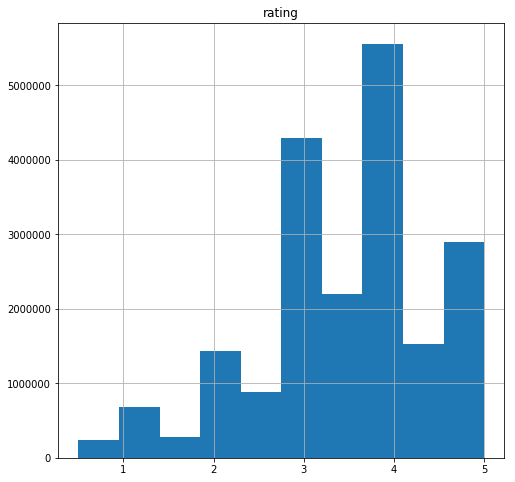

In [73]:
%matplotlib inline

ratings.hist(column='rating', figsize=(8,8))

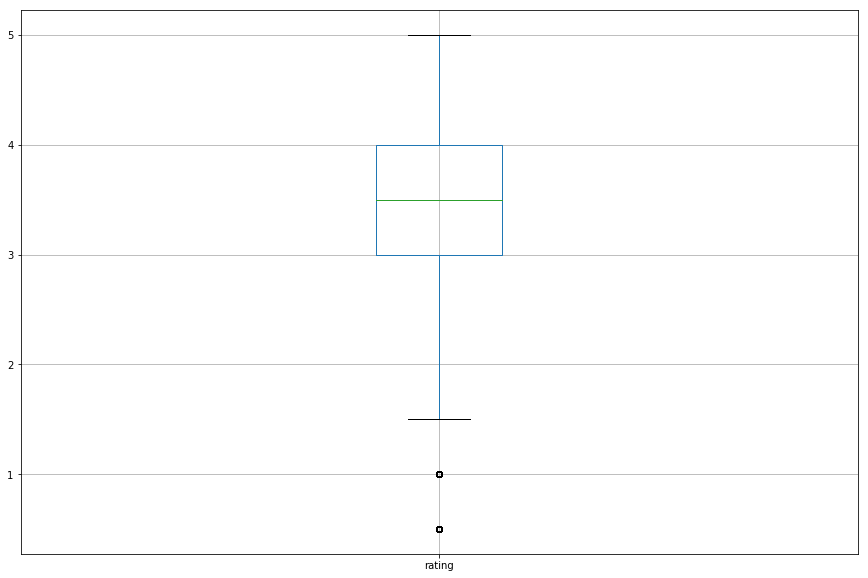

In [74]:
ratings.boxplot(column='rating',figsize=(15,10))

<h1 style="font-size:2em;color:#2467C0">Slicing Out Columns</h1>
 

In [ ]:
tags['tag'].head()

In [ ]:
movies[['title','genres']].head()


In [ ]:
ratings[1000:1010]

In [ ]:
tag_counts = tags['tag'].value_counts()
tag_counts[:]

In [ ]:
tag_counts[:10].plot(kind='bar', figsize=(15,10))

<h1 style="font-size:2em;color:#2467C0">Filters for Selecting Rows</h1>

In [ ]:
is_highly_rated = ratings['rating'] >= 4.0

ratings[is_highly_rated][-5:]

In [ ]:
is_animation = movies['genres'].str.contains('Animation')

movies[is_animation][5:15]

In [ ]:
movies[is_animation].head(15)

<h1 style="font-size:2em;color:#2467C0">Group By and Aggregate </h1>

In [ ]:
ratings_count = ratings[['movieId','rating']].groupby('rating').count()
ratings_count

In [ ]:
average_rating = ratings[['movieId','rating']].groupby('movieId').mean()
average_rating.tail()

In [ ]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.head()

In [ ]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.tail()

<h1 style="font-size:2em;color:#2467C0">Merge Dataframes</h1>

In [ ]:
tags.head()

In [ ]:
movies.head()

In [ ]:
t = movies.merge(tags, on='movieId', how='inner')
t.head()

More examples: http://pandas.pydata.org/pandas-docs/stable/merging.html

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>


Combine aggregation, merging, and filters to get useful analytics
</p>

In [ ]:
avg_ratings = ratings.groupby('movieId', as_index=False).mean()
del avg_ratings['userId']
avg_ratings.head()

In [ ]:
box_office = movies.merge(avg_ratings, on='movieId', how='inner')
box_office.tail()

In [ ]:
is_highly_rated = box_office['rating'] >= 4.0

box_office[is_highly_rated][-5:]

In [ ]:
is_comedy = box_office['genres'].str.contains('Comedy')

box_office[is_comedy][:5]

In [ ]:
box_office[is_comedy & is_highly_rated][-5:]

<h1 style="font-size:2em;color:#2467C0">Vectorized String Operations</h1>


In [ ]:
movies.head()

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

Split 'genres' into multiple columns

<br> </p>

In [ ]:
movie_genres = movies['genres'].str.split('|', expand=True)

In [ ]:
movie_genres[:10]

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

Add a new column for comedy genre flag

<br> </p>

In [ ]:
movie_genres['isComedy'] = movies['genres'].str.contains('Comedy')

In [ ]:
movie_genres[:10]

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

Extract year from title e.g. (1995)

<br> </p>

In [ ]:
movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)

In [ ]:
movies.tail()

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

More here: http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods
<br> </p>

<h1 style="font-size:2em;color:#2467C0">Parsing Timestamps</h1>

Timestamps are common in sensor data or other time series datasets.
Let us revisit the *tags.csv* dataset and read the timestamps!


In [ ]:
tags = pd.read_csv('./movielens/tags.csv', sep=',')

In [ ]:
tags.dtypes

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Unix time / POSIX time / epoch time records 
time in seconds <br> since midnight Coordinated Universal Time (UTC) of January 1, 1970
</p>

In [ ]:
tags.head(5)

In [ ]:
tags['parsed_time'] = pd.to_datetime(tags['timestamp'], unit='s')

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Data Type datetime64[ns] maps to either <M8[ns] or >M8[ns] depending on the hardware

</p>

In [ ]:

tags['parsed_time'].dtype

In [ ]:
tags.head(2)

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Selecting rows based on timestamps
</p>

In [ ]:
greater_than_t = tags['parsed_time'] > '2015-02-01'

selected_rows = tags[greater_than_t]

tags.shape, selected_rows.shape

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Sorting the table using the timestamps
</p>

In [ ]:
tags.sort_values(by='parsed_time', ascending=True)[:10]

<h1 style="font-size:2em;color:#2467C0">Average Movie Ratings over Time </h1>
## Are Movie Ratings related to the Year of Launch?

In [ ]:
average_rating = ratings[['movieId','rating']].groupby('movieId', as_index=False).mean()
average_rating.tail()

In [ ]:
joined = movies.merge(average_rating, on='movieId', how='inner')
joined.head()
joined.corr()

In [ ]:
yearly_average = joined[['year','rating']].groupby('year', as_index=False).mean()
yearly_average[:10]

In [ ]:
yearly_average[-20:].plot(x='year', y='rating', figsize=(15,10), grid=True)

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Do some years look better for the box office movies than others? <br><br>

Does any data point seem like an outlier in some sense?

</p>